**First we will check the GPU**

In [1]:
!nvidia-smi

Tue Jul 23 15:33:25 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install needed libraries

In [2]:
!pip install ultralytics

# Imports

In [3]:
import os
import cv2
from IPython.display import display,Image
from IPython import display
display.clear_output()
from ultralytics import YOLO


# Load the dataset

we will do that by roboflow

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JTUctzw9bONEOVa92oUi")
project = rf.workspace("biac").project("biac")
version = project.version(31)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.63, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to BIAC-31 in yolov8:: 100%|██████████| 6860/6860 [00:01<00:00, 5940.14it/s]


# Load the model and training

In [6]:
model = YOLO("yolov8s-seg.pt")

model.train(data="/content/BIAC-31/data.yaml", epochs=100)  # train the model

100%|██████████| 22.8M/22.8M [00:00<00:00, 329MB/s]


Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/BIAC-31/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

100%|██████████| 755k/755k [00:00<00:00, 44.8MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 160MB/s]


AMP: checks passed ✅


train: Scanning /content/BIAC-31/train/labels... 3081 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3081/3081 [00:02<00:00, 1540.03it/s]


train: New cache created: /content/BIAC-31/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/BIAC-31/valid/labels... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<00:00, 722.81it/s]


val: New cache created: /content/BIAC-31/valid/labels.cache
Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.28G      1.324      2.938      2.227      1.595         29        640: 100%|██████████| 193/193 [01:53<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        200        291       0.27      0.333      0.223      0.092      0.265      0.325      0.219     0.0913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      5.09G      1.438       2.89      2.007      1.672         34        640: 100%|██████████| 193/193 [01:35<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        200        291      0.331      0.265      0.195     0.0842      0.323      0.239      0.178     0.0776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      5.06G      1.444      2.866       1.96      1.673         21        640: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        200        291      0.314       0.38      0.304      0.139      0.341      0.358      0.272      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      5.08G      1.408      2.831      1.891      1.649         26        640: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]


                   all        200        291      0.418      0.406      0.352        0.2      0.414      0.393       0.35      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100       5.1G      1.359      2.718      1.795      1.623         34        640: 100%|██████████| 193/193 [01:34<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        200        291      0.409      0.412      0.354        0.2      0.392      0.407       0.34      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      5.07G      1.345      2.701      1.769      1.609         21        640: 100%|██████████| 193/193 [01:40<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.29it/s]


                   all        200        291      0.506      0.496      0.483      0.292       0.51      0.484      0.467      0.257

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      5.09G      1.301      2.665      1.723      1.575         32        640: 100%|██████████| 193/193 [01:40<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.75it/s]

                   all        200        291      0.432      0.477      0.447       0.26      0.429      0.459       0.43      0.241



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      5.12G      1.296      2.663      1.711      1.571         22        640: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]

                   all        200        291      0.624      0.394      0.477      0.289       0.62      0.391      0.455      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      5.09G      1.271      2.585      1.654      1.541         25        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        200        291      0.581      0.412      0.497      0.301      0.574      0.401      0.491      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      5.03G      1.239      2.551      1.609      1.511         36        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.69it/s]

                   all        200        291      0.527      0.504      0.514      0.307      0.518      0.501      0.502      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100      5.08G       1.24      2.526      1.593      1.513         33        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.66it/s]

                   all        200        291      0.547      0.466      0.491      0.283      0.573      0.469      0.489      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      5.06G      1.227      2.495      1.568       1.51         43        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        200        291      0.503      0.449      0.479      0.295      0.505      0.447       0.47      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      5.05G      1.208      2.468      1.535      1.488         38        640: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        200        291       0.58      0.492      0.558      0.352      0.584      0.476      0.545      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100      5.06G      1.188      2.435       1.51      1.485         27        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]


                   all        200        291       0.46      0.531      0.526      0.318      0.455      0.517      0.517      0.291

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      5.09G      1.184      2.438      1.498      1.472         35        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        291      0.593      0.524      0.549      0.328      0.598      0.489      0.524      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100       5.1G      1.177      2.416      1.491      1.466         33        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]


                   all        200        291      0.504      0.539       0.54      0.329      0.497      0.533      0.525      0.309

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100      5.05G      1.159      2.373      1.444       1.45         34        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        200        291       0.52       0.54      0.534      0.327      0.527      0.529      0.526       0.31



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100       5.1G      1.155      2.357      1.421      1.452         36        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        200        291      0.633      0.505      0.557       0.34      0.621      0.488      0.537      0.307

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      5.09G      1.135      2.355      1.411      1.441         20        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]

                   all        200        291      0.572       0.52      0.553      0.317       0.55      0.503      0.531      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100      5.05G      1.129      2.317      1.388      1.433         30        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.67it/s]

                   all        200        291      0.599      0.551      0.588      0.371      0.673      0.509      0.586      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100      5.15G      1.123      2.297      1.385      1.429         37        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        200        291      0.622      0.543      0.584      0.365      0.628      0.548      0.582      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100      5.09G      1.107      2.303       1.35      1.415         24        640: 100%|██████████| 193/193 [01:36<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        200        291      0.671      0.495       0.56      0.366       0.63      0.493      0.541      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100       5.1G      1.113      2.283      1.364      1.414         36        640: 100%|██████████| 193/193 [01:36<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        200        291      0.649      0.526      0.582      0.366      0.658      0.514      0.572      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      5.09G      1.094      2.254      1.318      1.396         43        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        200        291      0.548      0.558      0.547      0.331      0.564      0.539      0.544      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      5.09G      1.093      2.256       1.33      1.407         27        640: 100%|██████████| 193/193 [01:39<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        200        291      0.642      0.508      0.593      0.372      0.637      0.496      0.579      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      5.07G      1.091      2.245      1.318      1.408         25        640: 100%|██████████| 193/193 [01:34<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        291       0.67      0.497        0.6      0.381      0.674        0.5      0.598      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      5.06G      1.084      2.232      1.289      1.402         30        640: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]

                   all        200        291       0.69      0.529      0.582      0.365      0.686      0.526      0.577      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      5.06G      1.076      2.196      1.268      1.393         33        640: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        200        291       0.59      0.536      0.599       0.38       0.63      0.497      0.578      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       5.1G      1.061      2.202      1.265      1.384         34        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        291      0.649      0.527       0.61      0.387      0.641      0.507       0.59      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      5.06G      1.057      2.151      1.218       1.37         38        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        200        291       0.54      0.588      0.579      0.376      0.529      0.561      0.556       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100      5.06G      1.043      2.151      1.214      1.358         37        640: 100%|██████████| 193/193 [01:31<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        200        291      0.597      0.601       0.59       0.37      0.629      0.572      0.585      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      5.06G      1.037      2.161      1.214      1.354         28        640: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        200        291       0.62      0.598      0.606      0.381      0.597      0.584      0.585       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      5.06G      1.023      2.101      1.176      1.338         33        640: 100%|██████████| 193/193 [01:37<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        200        291      0.671      0.559      0.634      0.406      0.646       0.55      0.624      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.06G      1.019      2.072      1.153      1.335         30        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        200        291      0.653      0.541      0.622      0.399      0.655       0.54      0.612      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.08G      1.012      2.076      1.139      1.335         28        640: 100%|██████████| 193/193 [01:36<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        200        291       0.65      0.575      0.613      0.381      0.646       0.55      0.588       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      5.06G      1.021      2.101      1.175      1.337         39        640: 100%|██████████| 193/193 [01:35<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        200        291      0.619      0.566       0.61      0.378      0.623      0.539      0.596      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      5.14G     0.9891      2.067      1.117      1.322         31        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        200        291      0.632      0.589      0.634      0.402      0.635      0.575      0.616      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      5.01G     0.9955      2.043      1.128      1.329         32        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.76it/s]

                   all        200        291       0.64      0.562      0.595      0.375      0.639      0.563      0.582      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      5.14G     0.9901      2.055       1.11      1.321         37        640: 100%|██████████| 193/193 [01:36<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.54it/s]

                   all        200        291      0.719      0.578      0.636        0.4      0.707      0.565      0.616      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      5.07G      0.977      2.039      1.084      1.309         30        640: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]


                   all        200        291      0.661      0.543      0.606      0.396      0.668      0.545      0.602       0.36

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      5.09G     0.9705      2.018      1.081      1.308         47        640: 100%|██████████| 193/193 [01:32<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        200        291       0.71      0.528      0.616      0.402      0.719       0.53      0.603      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      5.05G      0.964      2.003      1.065      1.302         32        640: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        291      0.662      0.584      0.648      0.416      0.662      0.585      0.634      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100      5.07G     0.9622      1.985      1.065      1.293         33        640: 100%|██████████| 193/193 [01:33<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]

                   all        200        291      0.575      0.568      0.601      0.405      0.622      0.548      0.602      0.366



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100      5.05G     0.9509      1.971       1.05      1.285         27        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]

                   all        200        291      0.739      0.516      0.632      0.415      0.748      0.517      0.629      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      5.07G     0.9498      1.955      1.029      1.283         30        640: 100%|██████████| 193/193 [01:37<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        291      0.638      0.552      0.619      0.402      0.643      0.556      0.615      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100      5.05G     0.9589      1.995      1.029      1.299         26        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        200        291      0.607      0.592      0.619      0.401      0.681      0.523      0.601      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100      5.08G      0.931      1.909     0.9903      1.269         33        640: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        200        291      0.611      0.576      0.619      0.401      0.653      0.537      0.601      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/100      5.09G     0.9342      1.923     0.9947      1.272         28        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.16it/s]

                   all        200        291       0.68      0.518      0.623      0.397       0.67      0.509      0.607      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/100      5.09G     0.9302      1.915     0.9658      1.268         31        640: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        200        291      0.685       0.59       0.65      0.418      0.666      0.582      0.638      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/100      5.06G     0.9086      1.881     0.9445      1.249         31        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        200        291      0.654      0.497      0.585      0.379       0.66        0.5      0.579       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/100      5.08G     0.9072      1.861     0.9375       1.25         28        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.73it/s]

                   all        200        291       0.63      0.529      0.599      0.389      0.647      0.526        0.6      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/100      5.09G     0.9127      1.861     0.9567      1.255         26        640: 100%|██████████| 193/193 [01:37<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        200        291      0.644      0.553      0.602       0.39      0.648      0.564      0.608      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/100       5.1G     0.8987      1.848     0.9315      1.248         28        640: 100%|██████████| 193/193 [01:34<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        200        291      0.604      0.576      0.603      0.397      0.611      0.545      0.595      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/100      5.06G     0.8924      1.862     0.9163      1.238         31        640: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.02it/s]


                   all        200        291      0.552      0.631      0.616      0.384      0.537      0.615      0.602      0.353

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/100      5.04G     0.8893      1.838     0.9262      1.232         37        640: 100%|██████████| 193/193 [01:31<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        200        291       0.67      0.511      0.615      0.402      0.639      0.522      0.603      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/100      5.09G     0.8799      1.813     0.8897      1.227         25        640: 100%|██████████| 193/193 [01:36<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        200        291      0.779      0.507      0.656      0.432      0.781      0.508      0.639      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/100      5.09G     0.8714      1.795     0.8797      1.227         26        640: 100%|██████████| 193/193 [01:31<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        200        291      0.719      0.533      0.628      0.407      0.592      0.605      0.607      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/100      5.04G     0.8645      1.805      0.878       1.22         44        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]

                   all        200        291      0.672      0.565      0.628        0.4      0.675      0.567      0.625      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/100      5.08G     0.8519      1.793     0.8564      1.211         30        640: 100%|██████████| 193/193 [01:36<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        200        291      0.651      0.578       0.62       0.38      0.648      0.581      0.621      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/100      5.06G      0.844      1.761     0.8379      1.207         35        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]

                   all        200        291      0.662      0.567      0.633      0.409      0.681      0.543       0.62      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/100      5.09G     0.8357      1.725     0.8137      1.195         34        640: 100%|██████████| 193/193 [01:39<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        200        291      0.678      0.567      0.629      0.388      0.684      0.572      0.629      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/100      5.04G     0.8448      1.743     0.8307      1.202         24        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.81it/s]

                   all        200        291      0.661      0.559      0.621      0.398      0.661      0.558      0.612       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/100      5.09G     0.8295      1.727     0.8013      1.194         39        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        200        291      0.625       0.58      0.614      0.395      0.646       0.57      0.618      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/100      5.07G      0.819      1.711     0.8105      1.182         32        640: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        200        291      0.651      0.582      0.626      0.409       0.67      0.555      0.616      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/100      5.07G     0.8155      1.704     0.7782      1.173         34        640: 100%|██████████| 193/193 [01:33<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


                   all        200        291       0.65      0.565      0.627      0.402      0.655      0.551      0.615      0.374

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/100      5.05G     0.8189      1.698     0.7808      1.184         26        640: 100%|██████████| 193/193 [01:33<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        200        291      0.669      0.569      0.633      0.406      0.628      0.584      0.613       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/100      5.12G     0.8102      1.668     0.7726      1.172         34        640: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        200        291      0.621      0.599      0.642      0.403      0.614      0.596      0.633      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/100      5.07G     0.8021      1.689     0.7791      1.178         31        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        200        291      0.725      0.576      0.651      0.422      0.718      0.567       0.64      0.403



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/100      5.06G     0.7987      1.665     0.7636      1.171         23        640: 100%|██████████| 193/193 [01:35<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]

                   all        200        291      0.717      0.584      0.645      0.399        0.7      0.564      0.625      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/100      5.06G     0.7948      1.659     0.7521      1.164         29        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.80it/s]

                   all        200        291      0.691      0.544      0.632      0.409      0.678      0.536      0.621      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/100       5.1G     0.7802      1.641     0.7381      1.154         35        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.50it/s]


                   all        200        291      0.738      0.544      0.643      0.419      0.732       0.53      0.638      0.394

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/100      5.11G      0.779      1.635     0.7298      1.153         34        640: 100%|██████████| 193/193 [01:37<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]


                   all        200        291      0.645      0.562      0.605      0.396      0.625      0.585      0.602      0.366

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.04G     0.7774      1.621     0.7262      1.157         33        640: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        200        291      0.744      0.563      0.646      0.407       0.71      0.537      0.608      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/100      5.04G     0.7634      1.623     0.7195      1.146         31        640: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.78it/s]

                   all        200        291      0.675      0.571      0.637      0.419      0.668       0.58      0.627      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/100      5.09G     0.7685      1.608     0.7064      1.145         35        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]

                   all        200        291      0.644      0.573      0.627      0.415       0.64      0.581      0.625      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/100      5.14G     0.7664      1.623     0.7043      1.147         30        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        200        291      0.707      0.528      0.633      0.412      0.707      0.532      0.619      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/100      5.07G     0.7482      1.575     0.6859      1.129         25        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        200        291       0.71      0.546      0.635      0.416      0.752      0.522      0.621      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/100      5.04G     0.7498      1.577     0.6772      1.134         52        640: 100%|██████████| 193/193 [01:37<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.86it/s]

                   all        200        291      0.698      0.575      0.638       0.41      0.692      0.559      0.625      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/100      5.07G     0.7597      1.597     0.6959      1.136         36        640: 100%|██████████| 193/193 [01:36<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        200        291      0.676      0.571      0.628      0.408      0.678      0.572      0.611      0.379



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/100      5.07G     0.7418      1.569     0.6674      1.126         29        640: 100%|██████████| 193/193 [01:36<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        291      0.702      0.556      0.616      0.403      0.698      0.553      0.601      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/100      5.06G     0.7457      1.586     0.6761      1.129         33        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        291      0.707      0.542      0.627      0.408      0.706      0.545       0.61      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/100      5.05G     0.7447      1.575     0.6603      1.126         30        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.75it/s]

                   all        200        291      0.664      0.562      0.604      0.388      0.665      0.563      0.605      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/100      5.08G     0.7292      1.544     0.6499      1.119         28        640: 100%|██████████| 193/193 [01:35<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        200        291      0.685      0.573      0.613      0.396      0.685      0.556      0.598      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/100      5.05G     0.7195      1.527     0.6313      1.109         31        640: 100%|██████████| 193/193 [01:34<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.74it/s]

                   all        200        291      0.706      0.534      0.618      0.391      0.698      0.532      0.604      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/100      5.07G     0.7156      1.524     0.6282      1.107         29        640: 100%|██████████| 193/193 [01:34<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]

                   all        200        291      0.669       0.59      0.631      0.407      0.659      0.585      0.612       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/100      5.06G     0.7079      1.511     0.6234      1.102         36        640: 100%|██████████| 193/193 [01:38<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        200        291      0.732      0.553      0.638      0.413      0.728       0.55      0.623      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/100      5.11G     0.7046      1.505     0.6251      1.103         32        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        200        291      0.742      0.567      0.623      0.404      0.725      0.549      0.603      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/100      5.07G     0.7004      1.507     0.6178      1.099         34        640: 100%|██████████| 193/193 [01:36<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.77it/s]

                   all        200        291      0.709      0.549      0.616      0.403      0.686      0.567      0.609      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/100      5.09G     0.7048      1.494     0.6114      1.098         29        640: 100%|██████████| 193/193 [01:32<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]

                   all        200        291      0.696      0.578      0.634       0.41      0.681      0.571      0.613      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/100      5.02G     0.7004      1.475     0.6111      1.096         27        640: 100%|██████████| 193/193 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        200        291      0.758       0.52      0.625       0.41      0.687      0.554      0.614      0.383


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.99G     0.6365      1.334     0.4784      1.108         10        640: 100%|██████████| 193/193 [01:31<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]

                   all        200        291      0.647      0.562      0.617      0.405      0.672      0.553      0.609      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.98G     0.6119      1.282     0.4372      1.092         11        640: 100%|██████████| 193/193 [01:25<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        291      0.729      0.546      0.608        0.4      0.734      0.532      0.595      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.98G     0.5866      1.245     0.4124      1.061         16        640: 100%|██████████| 193/193 [01:32<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        200        291      0.724      0.562      0.619      0.405      0.712      0.564      0.611      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.96G     0.5799      1.234     0.3972      1.061         12        640: 100%|██████████| 193/193 [01:29<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        200        291      0.784      0.515      0.627      0.407      0.745      0.524      0.611      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.99G     0.5728       1.23     0.3841      1.055         15        640: 100%|██████████| 193/193 [01:27<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.90it/s]

                   all        200        291       0.72      0.547      0.618      0.407      0.716      0.545      0.599      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/100         5G     0.5585      1.205     0.3784      1.046         13        640: 100%|██████████| 193/193 [01:27<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        200        291      0.674       0.57      0.612      0.398      0.657      0.574      0.599      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/100         5G     0.5613        1.2     0.3703      1.045         13        640: 100%|██████████| 193/193 [01:28<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.80it/s]

                   all        200        291      0.656      0.579      0.617      0.407      0.651      0.575      0.607      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.96G      0.551      1.196     0.3721      1.045         11        640: 100%|██████████| 193/193 [01:28<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.73it/s]

                   all        200        291      0.745      0.527      0.625      0.409      0.735      0.524       0.61      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.99G     0.5467      1.177     0.3635      1.035         11        640: 100%|██████████| 193/193 [01:26<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        200        291      0.767      0.515      0.619      0.408      0.756      0.512      0.614      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/100      5.01G     0.5403      1.176     0.3537      1.028         18        640: 100%|██████████| 193/193 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        200        291      0.774       0.52      0.625      0.412      0.697      0.567       0.62      0.387



100 epochs completed in 2.761 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 23.9MB
Optimizer stripped from runs/segment/train/weights/best.pt, 23.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:09<00:00,  1.32s/it]


                   all        200        291      0.725      0.576      0.651      0.422      0.718      0.566       0.64      0.403
               Degree1         80        113       0.83      0.619      0.709      0.426      0.809      0.602      0.679      0.381
               Degree2         65        112       0.62      0.473       0.52      0.332      0.617       0.46      0.515      0.314
               Degree3         56         66      0.726      0.636      0.723      0.509      0.728      0.636      0.724      0.513
Speed: 1.3ms preprocess, 5.3ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8ddee10dc0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04

# Validation

In [7]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.63 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,780,761 parameters, 0 gradients, 42.4 GFLOPs


val: Scanning /content/BIAC-31/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:11<00:00,  1.14it/s]


                   all        200        291      0.724      0.576      0.651      0.423      0.717      0.567       0.64      0.402
               Degree1         80        113      0.829      0.619      0.708      0.427      0.808      0.602       0.68      0.381
               Degree2         65        112      0.619      0.473      0.523      0.333      0.617      0.464      0.515      0.314
               Degree3         56         66      0.725      0.636      0.723      0.508      0.727      0.636      0.724      0.511
Speed: 0.7ms preprocess, 14.0ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to runs/segment/train2


array([    0.42687,     0.33302,     0.50777])

# Testing

In [10]:
from PIL import Image

# Load the image
image = Image.open("/content/test.jpg")

# Make a prediction
prediction = model.predict(image)

# Save the prediction
prediction[0].save("prediction.jpg")


0: 480x640 2 Degree1s, 18.3ms
Speed: 2.6ms preprocess, 18.3ms inference, 5.5ms postprocess per image at shape (1, 3, 480, 640)


'prediction.jpg'

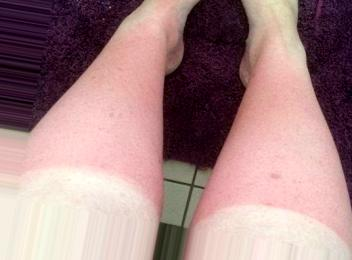

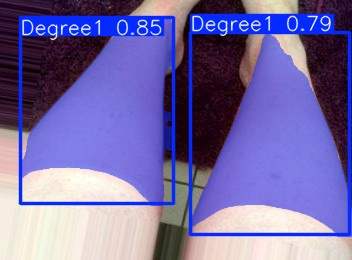

In [14]:
from IPython.display import display, Image

# Paths to images
image1_path = '/content/test.jpg'
image2_path = '/content/prediction.jpg'

# Display the images
display(Image(filename=image1_path, width=400), Image(filename=image2_path, width=400))
